In [ ]:
import matplotlib.pyplot as plt
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })


# Задача вывода

Чтобы найти значение незвестной величины необходимо провести эксперимент. Будь то вероятность распада элементарной частицы, среднее число посетителей сайта, или точность работы промышленного робота - мы проводим эксперименты. Измеряемые значения, как правило, являются случайными величинами с распределением зависящим от искомой величины. Так, число посетителей сайта связано с его популярностью, но все же является флуктуацией вокруг какого-то среднего. Проанализировав распады тысячи частиц мы сможем посчитать среднюю вероятность распада в единицу времени, но результат будет розниться от эксперимента к экперименту.

Задача оценки параметра модели по результатам эксперимента называется задачей вывода (inference). В классической статистике считется что существует некоторое истиное значение параметра и мы пытаемся предсказать в каких пределах будут меняться значения этого параметра измереные в  будущих экспериментах. Например - мы считаем что есть некоторая истинная вероятность распада элменетарной частицы, и мы, по результатам нашего эксперимента, пытаемся оценить какие значения могут получать будущие исследователи.

В байесовской интерпретации мы пытаемся составить оценку которая бы наилучшим образом уживалась с получеными измерениями и нашими априорными представлениями. В прошлой лекции мы уже вводили понятие байесовского вывода - трансформации априорных распределений с учетом экспериментальных данных. В ходе лекции мы будем придерживаться байесовской трактовки задачи вывода.

В статистике процесс оценки параметров модели из данных называется фитированием (fitting). В машинном обучении этот же процесс чаще называется тренировкой (training). Процесс фитирования обычно сводится к нахождению значений параметров минимизурющих функцию потерь  (loss function, objective):

$$\bar{\theta} = \underset{\theta}{\operatorname{argmin}}\mathcal{F}(\theta)$$

Такое решение может быть численным или аналитическим, точным или приближенным.

# Точечная оценка (point estimate)

Оценка параметра модели - это случайная величина с каким-то распределением. Иногда (когда мы верим что это распределение очень узкое и дисперсия параметра пренебрежимо мала) мы можем ограничиться точечной оценкой параметра (point estimate) - одним значением которое наилучшим образом описывает наше представление о параметре. 

Представьте что мы отвечаем за обслуживание комплекса зданий с 10000 лампочек. Часть лампочек (7000 штук) произведена фирмой "Светлячок", а другая (3000 штуки) - фирмой "Люстра". В ходе первого месяца использования из 7000 тысяч Светлячков 7 вышло из строя (0.1%), и за то же время из 3000 Люстр перегорело 300 (10%). В такой ситуации мы можем перестать заказывать "Люстры" и пренебречь ошибкой оценки вероятности выходы лампочки из строя. В то же время, если бы у нас перегорели всего 4 "Люстры", то оценки вероятности выхода лампы из строя были бы очень близки,и нам бы уже пришлось внимательно анализировать дисперсию оценки.

## Метод моментов

Одним из самых простых способов для быстрой точечной оценки является метод моментов. Моментом порядка $k$ случайной величины $X$ является статистика вида

$$E(X^k)$$

С некоторым моментами мы уже знакомы - моментом первого порядка  $E(X)$ является среднее, а центральным момнетом второго порядка $E([\bar{X}-X]^2)$- дисперсия.

В случае заданого распределения, его моменты зависят от параметров. Соответсвенно, параметры распределения можно выразить через его моменты.  Вспомним, например, равномерное распределние. Оно имеет два параметра - $a$ и $b$ (вернхнюю и нижнюю границу). Среднее и дисперсия выражаются через эти параметры как

$$\mu = \frac{a+b}{2}$$
$$\sigma^2 = \frac{(b-a)^2}{12}$$

Если решить эту систему уравниений относительно параметров $a$ и $b$, получим:

$$b = \frac{2\mu + \sqrt{12\sigma^2}}{2}$$
$$a =  \frac{2\mu - \sqrt{12\sigma^2}}{2}$$

Таким образом, если у нас есть выборка значений, и мы думаем что это значения равномерно распределенной случайной величины, мы можем оценить верхнюю и нижнюю границу распределения из полученых значений. Проиллюстрируем этот метод примером ниже.

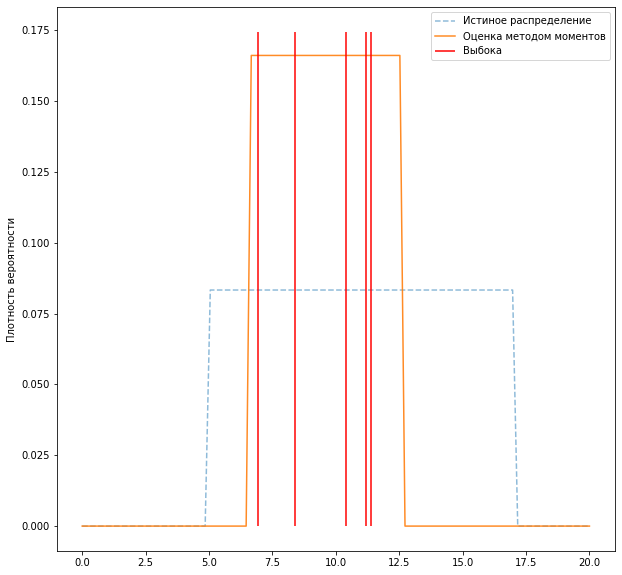

In [21]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Зададим  истиное распределение
true_a = 5
true_b = 17
true_distr = uniform(true_a, true_b - true_a)

# Создадим выборку
size = 5
sample = true_distr.rvs(size = size)

# Посчитаем моменты
mu = sample.mean()
sigma = sample.std()

# Оценим параметры из найденых моментоы
b = (2*mu+sigma*12**0.5)/2
a = (2*mu-sigma*12**0.5)/2

# Зададим распределение на оцененых параметрах
distr = uniform(a, b - a)

# Сравним истиное и найденые распределения
f = plt.figure(figsize = (10, 10))
x = np.linspace(0, 20, 100)
plt.plot(x, true_distr.pdf(x), ls = "--", alpha = 0.5, label = "Истиное распределение")
plt.plot(x, distr.pdf(x), alpha = 0.9, label = "Оценка методом моментов")
ymin, ymax = plt.gca().get_ylim()
plt.vlines(sample, 0, ymax, color = "red", label = "Выбока")
plt.ylabel("Плотность вероятности")
plt.legend()

Метод моментов позволяет быстро (и дешево в вычислительном плане) оценить значения параметра выбраного распределения. Однако он может давать абсурдные результаты. Представим что в примере выше наша выборка имеет вид $\{0, 0, 0, 0, 1\}$. Получим оценку границ равномерного распределения для этой выборки:

In [22]:
import numpy as np
sample = np.array([0, 0, 0, 0, 1])
mu = sample.mean()
sigma = sample.std()
b = (2*mu+sigma*12**0.5)/2
a = (2*mu-sigma*12**0.5)/2
print(f"a = {a:.1}; b = {b:.1}")


a = -0.5; b = 0.9


Видно, что метод моментов дает заведомо нерелистичную оценку верхней границы - ее значение не может быть ниже максимального значения в выборке. 

## Минимизация Хи-квадрата

Еще одним вычислительно дешевым методом оценки параметров является оценка полученая минимзацией хи-квадрата (метод Пирсона). В случае обучения без учителя (оценки параметров распределения случайной величины) этот метод применим только для данных разбитых на бины (для гистограм), что значит что метод плохо работает с данными большой размерности. 

Итак, допустим что мы хотим оценить параметры $\boldsymbol{\theta}$ модели $p(X|\boldsymbol{\theta})$ описывающей распределение значений случайной величины $X$. Мы проводим оценку анализируя выборку значений $\{x_1, x_2, ..., x_n\}$ представленых в виде отнормированной гистограмы: в каждом бине с цетром в $\hat{x}_i$ содержится $\frac{N_i}{\sum_{i} N_i}$ значений.

Для каждого бина можно посчиать отклонение измеренного значения $\frac{N_i}{\sum_i N_i}$ от предполанаемого значения модели $p(\hat{x}_i|\boldsymbol{\theta})$:

$$\Delta y_i = p(\hat{x}_i|\boldsymbol{\theta}) - \frac{N_i}{N}$$

Если мы верим что наша модель подходит для описания данных и истиное значение параметров модели это $\hat{\boldsymbol{\theta}}$ то число измерений в каждом бине будет Пуассоновской случайной величиной со средним $p(\hat{x}_i|\hat{\boldsymbol{\theta}})$. Соотвествтенно, при достаточно большом количестве измерений (больше 50) отклонение $\Delta y_i$ будет хорошо описываться нормальным распределением $\mathcal{N}(\mu = 0, \sigma_i^2 = p(\hat{x}_i|\hat{\boldsymbol{\theta}})\times N)$ (Отметим, что дополнительные источники погрешности измерений значений $N_i$ могут увеличить $\sigma_i$). Соответственно, величина $\Delta y_i/\sigma_i$ будет распределена как $\mathcal{N}(0, 1)$.

Рассмотрим сумму квадратов нормированных отклоений по всем бинам:

$$\chi^2 = \sum_{i}(\frac{\Delta y_i}{\sigma_i})^2$$

Эта сумма будет тем меньше чем точнее модель описывает данные. Таким образом, мы можем ввести _функцию потерь_ описывающую расхождение модели и данных. Значения параметров минимизирующие функцию потерь будут обеспечивать наилучшую модель. 
Сумма квадратов нормально распределенных случайных величин распределена по закону хи-квадрат. Это и дало названию метрики: сумма квадратов отклонений в методе Пирсона  обозначается как $\chi^2$.

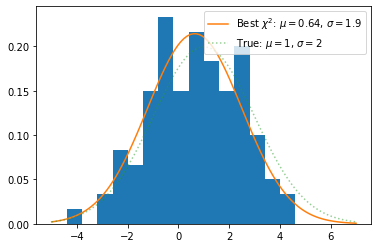

In [152]:
from scipy.stats import norm, chisquare
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Creating sample - from Norm distribution
mu_true = 1
sigma_true = 2
unbinned_data = norm(mu_true, sigma_true).rvs(100)

# Creating bins
counts, bins = np.histogram(unbinned_data, bins = 20, range = [-5,7], density = False)
bin_means = (bins[1:]+bins[:-1])/2

# Defining chi2:
def func(pars):
    pdf = norm(pars[0], pars[1]).pdf(bin_means)
    pdf = pdf/np.sum(pdf)*np.sum(counts)
    # Manualy copmuting chi2
    sigmas = counts**0.5
    chi2 = ((pdf - counts)/sigmas)**2
    # We could replace two line above with 
    # scipy function:
    # chi2 = chisquare(counts, pdf)[0]
    return chi2

# Finding optimal values:
initial_guess = [0.5, 1.5]
min_chi2_pars = minimize(func, initial_guess, bounds = [[-5, 5],[1, 10]])

# Plotting results
x = np.linspace(-5, 7, 100)
plt.hist(bins[:-1], bins, weights=counts, density = True)
plt.plot(x, norm(*tuple(min_chi2_pars.x)).pdf(x), \
         label = f"Best $\chi^2$: $\mu = {min_chi2_pars.x[0]:.2}$, $\sigma = {min_chi2_pars.x[1]:.2}$")
plt.plot(x, norm(mu_true, sigma_true).pdf(x), alpha = 0.5, ls = ':',\
         label = f'True: $\mu = {mu_true}$, $\sigma = {sigma_true}$')
plt.legend()

Значение величины $\chi^2$ полученное в ходе минимизации (в отличие от функции правдоподобия) имеет важный смысл. Оно показывает насколько выбраная модель подходит для описания данных. Величина $\chi^2$ является статистикой выборки распрееленой по закону $\chi^2$. Распределение $\chi^2$ задается числом степеней свободы $k$ - количеством независимых квадратов случайых величин. 

Число степеней свободы растет с числом бинов гистограммы. Число степеней свободы падает с введением ограничений на значения случайных величин. Так, требование идентичности суммы ожидаемых и измеренных значений уменьшает число степенй свободы на 1. Более того, каждый свободный параметр модели так же уменьшает число степеней свободы. 

Таким образом, число степеней свободы описывающих распределений статистики $\chi^2$ задается формулой:

$$k = N_{\text{bins}} -1 - N_{\text{pars}}$$

В примере с 20 бинами и 2 парамерами число степенй свободы оказывается 17.

Итак, мы знаем распределение из которого должно получаться значение $\chi^2$ нашего эксперимента. Рассмотрим распределение $\chi^2$ с 17 степенями свободы и отметим значения $\chi^2$ соотвутвующие 20 и 57.

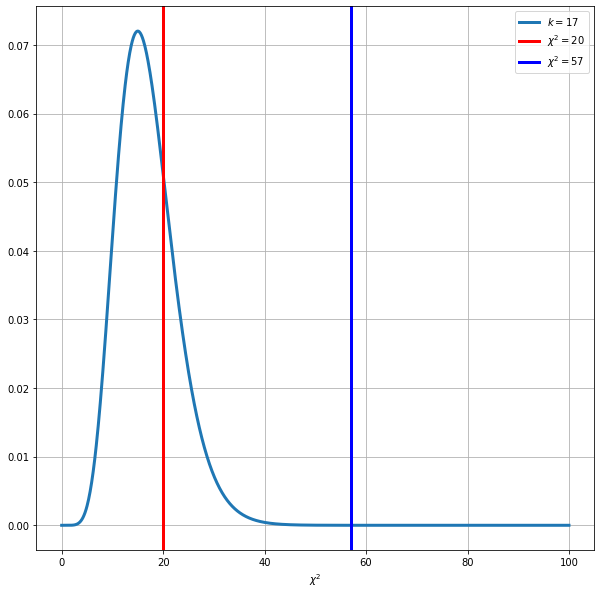

In [173]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(0,100,1000)
ax.plot(x, chi2.pdf(x,17), label="$k=17$", linewidth = 3)
ax.axvline(20, color = "red", linewidth = 3, label = "$\chi^2 = 20$")
ax.axvline(57, color = "blue", linewidth = 3, label = "$\chi^2 = 57$")
ax.set_xlabel('$\chi^2$')
ax.legend(loc='best', frameon=True)
ax.grid(True)

Видно, что если проводить выборку случайных величин из распределения выше, то значение $\chi^2 =  20$ кажется намного более вероятным чем $\chi^2 = 57$. Соотвественно, если после минимизации $\chi^2$ полученная величина $\chi^2$ оказывается значительно больше ожидаемой (k), это означает что среднее квадратичное отклонение измеренной величины в каждом бине $\Delta y_i^2$ от ожидаемой $\sigma_i^2$ сильно больше 1. В случае верного применения теста это может означать что наблюдаемые данные вряд ли были получены из выбраной модели. Величина $\chi^2/k$ (или $\chi^2/dof$) является мерой качества фитирования - качества выбора модели для описания даннных (goodness of fit). Значения $\chi^2/k >> 1$ как правило свидетельствуют о неправильой модели. На примере ниже мы сравниваем две модели описываюшие нормально распределенные данные и наилучшие значения $\chi^2/k$ для этих моделей.

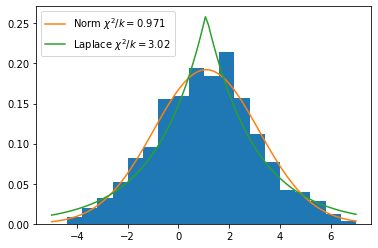

In [202]:
from scipy.stats import norm, chisquare, laplace
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Creating sample - from Norm distribution
mu_true = 1
sigma_true = 2
nbins = 20
unbinned_data = norm(mu_true, sigma_true).rvs(1000)

# Creating bins
counts, bins = np.histogram(unbinned_data, bins = nbins, range = [-5,7], density = False)
bin_means = (bins[1:]+bins[:-1])/2

def func1(pars):
    pdf = norm(pars[0], pars[1]).pdf(bin_means)
    pdf = pdf/np.sum(pdf)*np.sum(counts)
    chi2 = chisquare(counts, pdf)[0]
    return chi2

def func2(pars):
    pdf = laplace(pars[0], pars[1]).pdf(bin_means)
    pdf = pdf/np.sum(pdf)*np.sum(counts)
    chi2 = chisquare(counts, pdf)[0]
    return chi2

# Finding optimal values:
initial_guess = [0.5, 1.5]
pars1 = minimize(func1, initial_guess, bounds = [[-5, 5],[1, 10]])
chi2_1 = func1(pars1.x)
pars2 = minimize(func2, initial_guess, bounds = [[-5, 5],[1, 10]])
chi2_2 = func2(pars2.x)

k = nbins - 1 - 2

# # Plotting results
x = np.linspace(-5, 7, 100)
plt.hist(bins[:-1], bins, weights=counts, density = True)
plt.plot(x, norm(*tuple(pars1.x)).pdf(x), \
         label = f"Norm $\chi^2/k = {chi2_1/k:.3}$")
plt.plot(x, laplace(*tuple(pars2.x)).pdf(x), \
         label = f"Laplace $\chi^2/k = {chi2_2/k:.3}$")
plt.legend()

### Минимизация хи-квадрата для обучения с учителем

Рассмотрим теперь задачу регрессии - поиска параметров модели распределения случайной величины $y$ зависящей от вектора входных переменных $\boldsymbol{x}$: 

$$p(y|\boldsymbol{x}) = f(\boldsymbol{\theta}(\boldsymbol{x}))$$

Обучающая выборка задачи регрессии состоит из пар вида $(y_i,\boldsymbol{x}_i)$. Для каждого входного значения $\boldsymbol{x}_i$ модель для распределения случайной величины $y$ предсказывает среднее значение $\hat{y}_i$ и дисперисию $\sigma_i$. Если случайная величина $y$ распределена нормально в каждой точке $\boldsymbol{x}_i$, то сумма квадратов отклонений на обучающей выборке будет распределена как $\chi^2$:

$$\chi^2 = \sum_{i}\frac{(y_i - \hat{y}_i)^2}{\sigma^2_i}$$

Соответсвенно, минимизация $\chi^2$ в такой задаче позволит найти хорошую модель и оценить качество фитирования.

Рассммотрим пример минимизации $\chi^2$ для фитирования гетроскедастической регрессии.

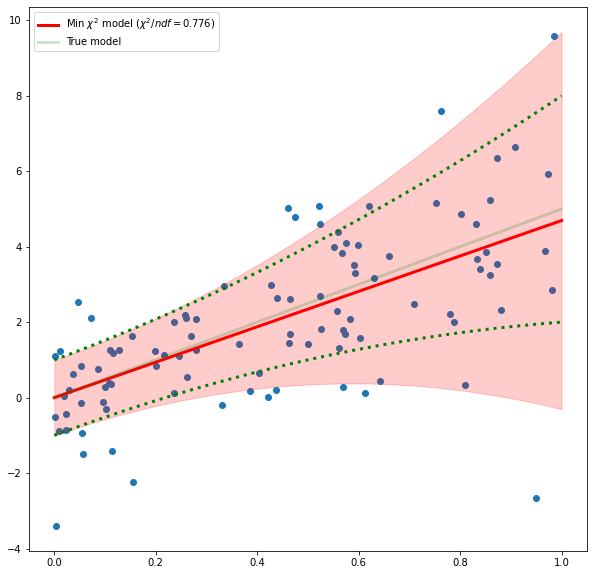

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

# Defining the model
def model(x_i, pars):
    mu = pars[0]*x_i 
    sigma = pars[1]*x_i**2 + 1
    return norm(mu, sigma), mu, sigma

true_pars = [5, 2]

# Defining points of training sample
x = np.random.rand(100)
y = np.array([model(x_i, true_pars)[0].rvs() for x_i in x])

# Defining chi2
def func(pars):
    y_hats = np.array([model(x_i, pars)[1] for x_i in x])
    sigmas = np.array([model(x_i, pars)[2] for x_i in x])
    chi2 = np.sum((y_hats - y)**2/sigmas**2)
    return chi2

# Minimizing chi2
initial_guess = [0, 0]
pars = minimize(func, initial_guess, bounds = [[-10, 10],
                                               [-0.5, 4]])
# Getting final chi2 and D.o.F.
chi2 = func(pars.x)
k = len(x) - len(true_pars)

# Plotting
_x = np.linspace(0,1,100)
means = model(_x, pars.x)[1]
sigmas = model(_x, pars.x)[2]
true_means = model(_x, true_pars)[1]
true_sigmas = model(_x, true_pars)[2]

f = plt.figure(figsize = (10, 10))
plt.scatter(x, y)
plt.plot(_x,means, color = "red", linewidth = 3, label = f"Min $\chi^2$ model ($\chi^2/ndf = {chi2/k:.3f}$)")
plt.fill_between(_x, means - sigmas, means+sigmas, alpha = 0.2, color = "red")
plt.plot(_x,true_means, linewidth = 3, color = "green", alpha = 0.2, label = "True model")
plt.plot(_x,true_means - true_sigmas, linewidth = 3, ls = ":", color = "green")
plt.plot(_x,true_means + true_sigmas, linewidth = 3, ls = ":", color = "green")
plt.legend()

## Оценка наибольшего правдоподобия

Метод моментов и минимизация хи-квадрата являются приближеным решениями. В обшем случае, для нахождения параметров модели описывающих дынне наилучшим образом нужно максимизировать функцию правдоподобия. В самом деле, в прошлой лекции мы ввели функцию описывающую правдоподобность различных значений параметра. Значение параметра максимизирующее эту функцию и будет наиболее правдоподобным. Такая оценка называется оценкой наибольшего правдоподобия (Maximum Likelihood Estimate, MLE). 

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmax}}\mathcal{L}(\theta)\equiv \underset{\theta}{\operatorname{argmin}}(-\log\mathcal{L}(\theta))$$

Если распределение случайной величины $y$ зависит не только от параметров распределения $\theta$ но и от входной переменной $x$ задача поиска оценки максимального правдоподобия записывается следующим образом:

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmin}}-\sum_{i=1}^{N_\mathcal{D}}\log p(y_i|x_i, \theta)$$

Тут $N_\mathcal{D}$ это объем выборки, и каждое значение выборки имеет вид $(x_i, y_i)$, где $x_i$ - это входная переменная, а $y_i$ - случайная величниа. Несложно видить что в такой формулировке задача поиска значений максимального правдоподобия приобретает вид треировки модели в задаче обучения с учителем: мы ищем модель наилучшим образом предсказывающую величину $y$ для входных данных $x$.

Если модель соответсвует обечению без учителя, то выражение для оценки MLE упрощается: 

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmin}}-\sum_{i=1}^{N_\mathcal{D}}\log p(y_i|\theta)$$

Как правило, такую задачу приходится решать при обработке данных из контролируемого эксперимента, где значения входных переменных зафиксированы. 

Благодаря своему способу построения эта оценка гарантирует значения параметров позволяющие наилучшим образом описать данные с помошью выбраной модели. В самом деле, допустим что у нас есть выборка $N$ значений случайной величины $\mathbf{y}$. Эмперическое распределние функции плотности вероятности для этой величины будет

$$p_{\mathcal{D}} = \frac{1}{N}\sum_{i=1}^{N}\delta(\mathbf{y} - \mathbf{y}_i)$$

Теперь, допустим мы считаем что величина $\mathbf{y}$ по какому-то параметрическому распределению $q(\mathbf{y})=p(\mathbf{y}|\theta)$. Найдем значения $\theta$ которые бы сделали распределение $q(\mathbf{y})$ максимально близким к $p_{\mathcal{D}}$.

Прежде всего, выберем как определять "близость" распределний. Стандартным выбором в этом случае является рассотяние Ку́льбака — Ле́йблера:

$$D_{KL}(p||q)=\sum_{\mathbf{y}}p(\mathbf{y})\log\frac{p(\mathbf{y})}{q(\mathbf{y})} = \underbrace{\sum_{\mathbf{y}}p(\mathbf{y})\log p(\mathbf{y})}_{-H(p)}
- \underbrace{\sum_{\mathbf{y}}p(\mathbf{y})\log q(\mathbf{y})}_{H_{cc}(p,q)}$$

Первое слагаемое $H(p)$ является энтропией исходного распределения и не зависит от параметров модели. Второй параметр яаляется кросс-энтропией распределени $q$ и $p$.

Учитывая что эмперическое распределение $p$ пердставляет собой набор дельта-функций, мы можем перейти от суммированию по всему множеству значений $\mathbf{y}$ к сумированию по значениям выборки при подсчете кросс-энтропии:

$$D_{KL}(p||q)=const -\frac{1}{N}\sum_{i = 1}^{N}\log p(\mathbf{y}_i|\theta) = const + NLL(\theta)$$

Таким образом, минимизация отрицательного логарифма функции правдоподобия (или максимизация правдоподобия) ведет к минимуму расстояния  Ку́льбака — Ле́йблера. А значит,  полученное распределение $q(\mathbf{y})$ наилучшим образом описывает данные с учетом выбраной модели.

### MLE для распределения Бернулли

В общем случае максимум функци правдоподобия ищется численно. Тем не менее, полезно рассмотреть значения этой оценки для случаев когда ее можно выполнить аналитически.

Рассмотрим  серию экспериментов Бернулли и найдем оценку максимального правдоподобия для параметра распределения $\theta$:

$$\log\mathcal{L}(\theta) = \sum_{i=1}^{N}\log(p(y_i|\theta)) = \sum_{i=1}^{N}\log(\theta^{y_i}(1-\theta)^{1-y_i}) = \sum_{i}y_i \log\theta + \sum_{i}(1-y_i)\log{\theta}  $$ 

Учитывая, что $y_i$ принимает только значения $\{0, 1\}$, получим: 

$$\log\mathcal{L}(\theta) = N_1\log\theta +N_0\log(1-\theta)$$

Найдем производную функции:

$$\frac{d}{d\theta}\log\mathcal{L}(\theta) = \frac{N_1}{\theta}+\frac{N_0}{1-\theta}$$

Экстремум функции будет при нуле производной. Получим и решим урванение относительно $\theta_{MLE}$:

$$\frac{N_1}{\theta_{MLE}}+\frac{N_0}{1-\theta_{MLE}} = 0$$
$$\theta_{MLE}=\frac{N_1}{N_1+N_0}$$

Таким образом, оценка наибольшего правдоподобия для парметра распределения Бернулли будет просто средним по выборке - что соответствует нитуитивным ожиданиям.

### MLE для равномерного распределения

Вернемся к примерну равномерного распределения из иллюстрации метода моментов. Пусть $y\sim U(a,b)$ и у нас есть выборка из $N$ значений. Составим функцию правдоподобия. 

$$\mathcal{L}(a, b) = \prod_{i=1}^{N} p(y_i|a,b)$$

Заметим, что функция отлична от нуля только если все значения выборки внутри диапазона $[a,b]$. Пусть $a\leq y_{min}$ и $b\geq y_{max}$. Тогда:

$$-\log\mathcal{L}(a, b) = -\sum_{i=1}^{N} \frac{1}{b - a} = -\frac{N}{b-a}$$
Учитывая, что $b>y_{max}\geq y_{min}\geq a$, максимум функции правдподобия будет при  $a = y_{min}$ и $b = y_{max}$.


### MLE для нормального распределения

Пусть $y\sim\mathcal{N}(\mu,\sigma^2)$, и пусть у нас есть выборка $N$ значений этой случайной величины. Можно ожидать, что самой правдоподобоной оценкой параметра $\mu$ будет среднее по выборке $\frac{1}{N}\sum_iy_i$, а самой правдоподобной оценкой дисперсии -  средний квадрат отклонения $\frac{1}{N}\sum_i(y_i-\bar{y})^2$ (отметим, что именно такие значения дал бы метод моментов). Проверим совпадет ли оценка наибольшего правдоподобия с интуитивно ожидаемой на этот раз.

$$-\log\mathcal{L}(\mu,\sigma^2) = -\sum_i\log[\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(y_i-\mu)^2}{2\sigma^2}] = 
\frac{1}{2\sigma^2}\sum_i(y_i-\mu)^2 + \frac{N}{2}\log(2\pi\sigma^2)$$

В точке экстремума производные этой функции должны быть равны нулю. Для начала найдем $\mu_{MLE}$:

$$d(-\log\mathcal{L}(\mu,\sigma^2) )/d\mu |_{\mu = \mu_{MLE}} = 0$$

Второе слагаемое NLL не зависит от $\mu$, поэтому производная сведентся к дифференциированию только первого слагаемого.

$$d NLL/d\mu = \frac{1}{2\sigma^2}\sum_id((y_i-\mu)^2)/d\mu =  -\frac{1}{\sigma^2}(\sum_i y_i-N\mu)$$

$$-\frac{1}{\sigma^2}\sum_i y_i-N\mu_{MLE} = 0 \rightarrow \mu_{MLE} = \frac{1}{N}\sum_i y_i \equiv \bar{y}$$

Аналогичным образом приравняем к нулю производную по дисперсси:

$$d NLL/d\sigma^2 = -\frac{1}{2\sigma^4}\sum_i(y_i-\mu)^2- \frac{N}{2\sigma^2}$$
$$ -\frac{1}{2\sigma_{MLE}^4}\sum_i(y_i-\mu)^2+\frac{N}{2\sigma_{MLE}^2} = 0$$
$$ -\frac{1}{2\sigma_{MLE}^2}(\frac{1}{\sigma_{MLE}^2}\sum_i(y_i-\mu)^2- \frac{N}{2}) = 0$$
$$\sigma_{MLE}^2 = \frac{1}{N}\sum_i(y_i-\mu_{MLE})^2\equiv s^2$$

Получается что и в случае с нормальным распределением оценка максимального правдоподобия совпала с интуитивно ожидаемой. 

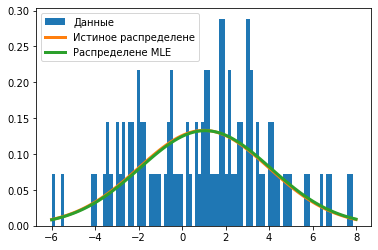

In [79]:
from scipy.stats import norm
import matplotlib.pyplot as plt

true_mu = 1
true_sigma = 3
sample = norm(true_mu, true_sigma).rvs(100)
mu = sample.mean()
sigma = sample.std()

x = np.linspace(-6, 8, 100)
plt.hist(sample, range = [-6, 8], bins = 100, density = True, label = "Данные")
plt.plot(x, norm(true_mu, true_sigma).pdf(x), lw = 3,  label = "Истиное распределене")
plt.plot(x, norm(mu, sigma).pdf(x), lw = 3,  label = "Распределене MLE")
plt.legend()

### MLE для линейной регресии

В лекции 3 мы ввели модель линейной регрессии для описания случайной величины параметры распределения которой зависят от входящей переменной: $y\sim\mathcal{N}(\boldsymbol{w_\mu}^T\boldsymbol{x}+b,
\sigma^2)$. Так, модель линейной регрессии можно использовать для предсказания значения $y$ для данного значения $\boldsymbol{x}$. Покажем как "натренировать" линейную регрессию на данных - как определить параметры модели линейной регресси с помощью метода наибольшего правдоподобия.

Значения случайной величины $y$ распределены нормально:

$$p(y|\boldsymbol{x}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{w_\mu}^T\boldsymbol{x}, \sigma^2)$$

В этой формуле $\boldsymbol{x}$ - расширеный вектор входных значений, а $\boldsymbol{w_\mu}$ и $\sigma^2$ - параметры модели. "Расширеный" вектор $\boldsymbol{x}$ определяется как $(x_0, x_1, ..., x_n, 1)$ где $x_i$ - значение входной переменной $i$. Использование расширенного вектора позволяет включить значение интерсепта $b$ в состав вектора параметров модели: $\boldsymbol{w_\mu} = (w_0, w_1, ... w_n, b)$. 

При наблюдении выборки $\mathcal{D}$ из $N$ измерений вида $(y_i, \boldsymbol{x}_i)$ $NLL$ принимает вид:

$$NLL(\boldsymbol{w_\mu}, \sigma^2) = -\sum_i \log (\frac{1}{\sqrt{2\pi\sigma^2}}\exp[-\frac{1}{2\sigma^2}(y_i-\boldsymbol{w_\mu}^T\boldsymbol{x})^2])$$

Как и в случае с обычным распределением это выражение можно упростить  и представить его в виде двух слагаемых:

$$NLL(\boldsymbol{w_\mu}, \sigma^2) = \frac{1}{2\sigma^2}\sum_i(y_i -\boldsymbol{w_\mu}^T\boldsymbol{x})^2 +  \frac{N}{2}\log(2\pi\sigma^2)$$

Первое слагаемое в этом выражении пропорционально _остаточной сумме квадратов_ (Residual Sum of Squares, RSS):

$$RSS(\boldsymbol{w}) = \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2 \equiv \sum_i r_i^2$$

Величина $r$ в этой формуле называется остаточной ошибкой (residual error). Остаточная сумма кввадратов позволяет определить _средний квадрат ошибки_ (Mean Squared Error, MSE):

$$MSE(\boldsymbol{w}) = \frac{1}{N}RSS(\boldsymbol{w}) = \frac{1}{N} \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2 $$

Наконец, _корень среднего квадрата ошибки_ (root mean squared eror, RMSE) очевидным образом определяется через MSE:

$$RMSE(\boldsymbol{w}) = \sqrt{\frac{1}{N} \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2} $$

Видно, что поиск оценки наибольшего правдоподобия для параметров $\boldsymbol{w}$  сводится к минимизации среднего квадрата ошибки. Эта процедура назывется минимизацией _методом наименьних квадратов_ (Ordinary Least Squares, OLS). В курсе линейной алгебры можно показать, что у этой задачи существует точное аналитическое решение:

$$\boldsymbol{w}_{MLE} \equiv \underset{\boldsymbol{w}}{\operatorname{argmin}}RSS(\boldsymbol{w}) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

Тут $\boldsymbol{y}$ - вектор значенй случайной величины размерности длины выборки, а $\boldsymbol{X}$ - матрица значений входных параметров размерности длины выборки $\times$ число входных параметров.

#### Хи-квадрат для линейной регрессии

Несложно видеть, что задача линнейной регрессии сводится к минимизации $\chi^2$:

$$\chi^2 = \sum_{i}\frac{(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2}{\sigma^2} \equiv RSS/\sigma^2$$

Если распределение случайной величниы $y$ не является нормальным для каждого значения $\boldsymbol{x}_i$, то оценка с помошью метода наименьгих квадратов перестает быть оценкой наибольшего правдоподобия и попытка оценить качество фитирования с помощью $\chi^2$ бдет давать неверные резульаты.

### MLE  для задач классификации

В примере с линейной регрессией мы показали что минимизация квадрата ошибки эквивалентна поиску наибольшего правдоподобия. Рассмотрим похожим образом тренировку моделей для задачи классификации. 

Обучающая выборка в задаче классификации имеет вид $(y_i, \boldsymbol{x}_i)$, где $\boldsymbol{x}_i$ - вектор входных параметров, а $y_i$ принимает уникальные значения для каждой доступной категории. Модель классификации должна предсказывать категорию по вектору входных параметров, и модель тем лучше справляется со своей задачей чем меньше ошибок в ее предсказаниях. Соотвественно, в задачах классификации, минимизация функции правдоподобия сводится к минимизации _эмпирического риска_ (empirical risk).

Частым выбором функции потерь в задаче классификации является "0-1 функция" (0-1 loss):

$$l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i) = \begin{cases}
   0 &\text{ если }y_i=f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)\\
   1 &\text{ если }y_i\neq f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)
 \end{cases}$$
 
где $f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)$ является предиктором. Эмпирический риск выражается в таком случае как

$$\mathcal{L}(\theta) = \frac{1}{N}\sum_i l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i)$$

В случае всего двух категорий (бинарная проблема) эмирический риск можно записать немного проще. Пусть величина $y$ и ее предсказания $\eta = f(\boldsymbol{\theta},\boldsymbol{x})$ принмиают значения ${-1,1}$. Тогда величина $y\eta$ будет равна 1 если предсказание верно и $-1$ в противном случае. Получается, что функцию потерь можно переписать в виде:

$l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i)  = \mathbb{I}(y_i \neq \eta_i) \equiv \mathbb{I}(y_i\eta_i<0)$$

Эмпирический риск принимает вид:

$$\mathcal{L}(\boldsymbol{\theta}) = \frac{1}{N}\sum_i \mathbb{I}(y_i\eta_i<0)$$

Проиллюстрируем эмпирический риск для задачи бинарной классификации. Наша выборка будет состояить из пар $(y, x)$, где $y\in\{0,1\}$, а $x\in\mathbb{R}$. Модель будет иметь всего один параметр $x_0$, такой что:

$$y = \begin{cases}
   0 &\text{ если } x < x_0\\
   1 &\text{ если } x \geq x_0
 \end{cases}$$
 
 На рисунке ниже изображена выборка и распределение эмпирического риска в зависимотсти от значний $x_0$.

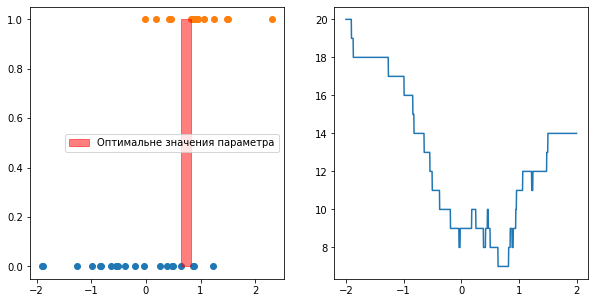

In [53]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
n_0 = 20
n_1 = 15
x_0 = norm(0, 1).rvs(n_0)
x_1 = norm(1, 0.5).rvs(n_1)

x = np.linspace(-2, 2, 1000)
er = []
for _x in x:
    er.append(len(x_0[x_0>=_x])+len(x_1[x_1<_x]))
er = np.array(er)


f, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(x_0, np.zeros(n_0))
ax[0].scatter(x_1, np.ones(n_1))
ax[0].fill_between(x, 0, 1, where = er == er.min(), color='red', alpha = 0.5, label = "Оптимальне значения параметра")
ax[0].legend()
ax[1].plot(x, er)

Видно, что числено минимизировать эмпирический риск в таком виде сложно - это ступенчатая функция с производной равной нулю везде где она определена. Для упрощения численного решения можно заменить $l_{01}(y\eta)$ суррогатной функцей потерь (surrogate loss function). Суррогатная функция потерь должна быть дифференциируемой (для численой минимизации) и результаты полученные в резлутате минимизации суррогатного риска были бы близки к результатам полученным при минимизации оригинального эмпирического риска.

Рассмотрим переход к суррогатной функции потерь на примере бинарной классификации. Пусть  $y\in\{-1, 1\}$ и модель предсказывает значения $\eta=f(\boldsymbol{\theta},\boldsymbol{x})$ такие что $\eta\in\mathbb{R}$. Соотвественно, предсказанное значение $\hat{y}$ определяется по правилу

$$\hat{y} = \begin{cases}
   -1 &\text{ если } \eta < 0\\
   1 &\text{ если } \eta \geq 0
 \end{cases}$$
 
Определим теперь вероятность принадлежности элемента выборки к классу $y$ для значений предсказания $\eta$:

$$p(y|\boldsymbol{\theta}_i,\boldsymbol{x}_i)=  \sigma(yf(\boldsymbol{\theta},\boldsymbol{x})) = \frac{1}{1+e^{-yf(\boldsymbol{\theta},\boldsymbol{x})}} \equiv \frac{1}{1+e^{-y\eta}}$$

Величина $y\eta$ называется _запасом_ (margin). Если запас положителен, то предсказание верно, а если отрицателен - то нет. Построим функцию правдоподобия:

$$NLL(\boldsymbol{\theta}) = \sum_i(1+e^{-y_i\eta_i}) = \sum_i(1+e^{-y_if(\boldsymbol{\theta},\boldsymbol{x}_i)}) $$

Для иллюстрации воспользуемся простейшей моделью с одним параметром $\eta = x - x_0$  b и сравним форму обратого логарифма функции правдоподобия с эмперическим риском

Text(0.5, 1.0, 'NLL логистической регресии')

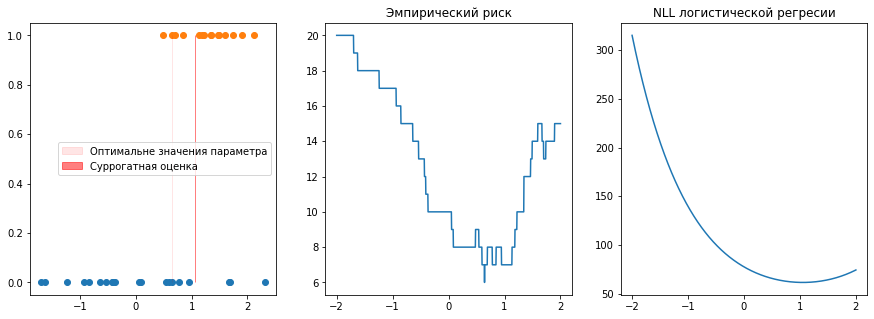

In [65]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
n_0 = 20
n_1 = 15
x_0 = norm(0, 1).rvs(n_0)
x_1 = norm(1, 0.5).rvs(n_1)

x = np.linspace(-2, 2, 1000)
er = []
nll = []
for _x in x:
    er.append(len(x_0[x_0>=_x])+len(x_1[x_1<_x]))
    _nll = 0
    for x0 in x_0:
        _nll += 1 + np.exp(x0-_x)
    for x1 in x_1:
        _nll += 1 + np.exp(-x1+_x)        
    nll.append(_nll)
er = np.array(er)
nll = np.array(nll)


f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(x_0, np.zeros(n_0))
ax[0].scatter(x_1, np.ones(n_1))
ax[0].fill_between(x, 0, 1, where = er == er.min(), color='red', alpha = 0.1, label = "Оптимальне значения параметра")
ax[0].fill_between(x, 0, 1, where = nll == nll.min(), color='red', alpha = 0.5, label = "Суррогатная оценка")
ax[0].legend()
ax[1].plot(x, er)
ax[1].set_title("Эмпирический риск")
ax[2].plot(x, nll)
ax[2].set_title("NLL логистической регресии")

Мы видим, что максимизация функции правдоподобия сводится к минимизации суммы логарифмов потерь (log loss):

$$l_{ll}(y,\eta) = -\log p(y|\eta) = \log(1+e^{-y\eta})$$

Это - пример суррогатной функции потерь. Она появляется в ходе оценки MLE модели логистической регрессии в бинарной классификации. Видно, что она обладает хорошей дифференцируемостью и минимизация логарифма потерь приводит к результату схожему с минимизацией эмпирического риска. 

## Апостериорная оценка

Оценка наибольшего правдоподобия не обязательно является субъективно "наилучшей" оценкой так как она не учитывает априрорные знания. Наилучшая точечная оценка учитывающая данные и априорные знания является оценкой наибольшего правдоподбия (maximum aposterior estimate, MAP).

### MAP Бета-биномиальной модели

В предыдущей лекции мы показали что функция правдоодобия для параметра $\theta$ (вероятность положительного исхода одного эксперимента) в серии экспериментов Бернулли является Бета-распределнием. Параметры бета-распределения при этом связаны с количеством положительных ($N_1$) и отрицательных ($N_0$) исходов:

$$\mathcal{L}(\theta|N_0, N_1) \sim \theta^{N_1}(1-\theta)^{N_0}\sim Beta(N_1+1, N_0+1)$$

В случае сопряженного априорного распределениея $P^{prior}(\theta)$ в виде Бета-распределния с параметрами $a$ и $b$, апостерирорное распределение так же останется Бета-распределением:

$$P(\theta|N_0, N_1, a, b) = Beta(\theta|a+N_1,b+N_0)\equiv Beta(\theta|\hat{a},\hat{b})$$

Соответсвтенно, вывод максимума апостерироного распределения в Бета-биномиальной модели будет выглядеть так же как вывод максимума функции правдоподобия который мы провели выше.

$$\theta_{MAP}=\frac{a + N_1-1}{a + b + N_1+N_0-2}$$

На рисунке ниже изображена эволюция оценок MAP и MLE оценок параметра $\theta$ в Бета-биномиальной модели с набором данных.

Text(0.5, 0, '$\\theta$')

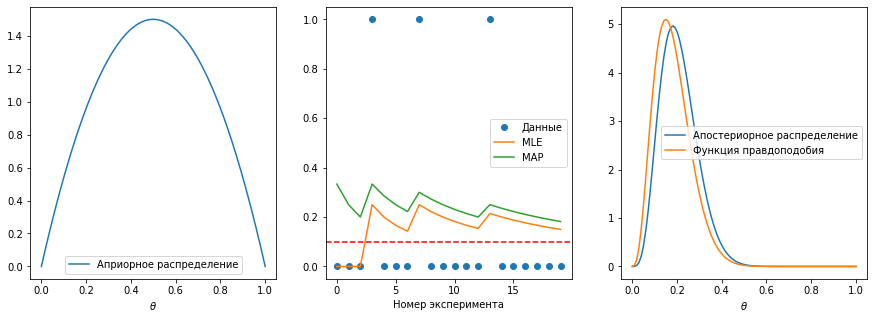

In [111]:
from scipy.stats import bernoulli, beta

p_true = 0.1
sample_size = 20
a = 2
b = 2


x = bernoulli(p_true).rvs(sample_size)
MLE = [np.mean(x[:i+1]) for i, j in enumerate(x)]
MAP = [(x[:i+1].sum()+a-1)/(i+1+b+a-2)  for i, j in enumerate(x)]

f, ax  = plt.subplots(1, 3, figsize = (15, 5))
_ = np.linspace(0, 1, 100)
ax[0].plot(_, beta(a, b).pdf(_), label = "Априорное распределение")
ax[0].legend()
ax[0].set_xlabel(r'$\theta$')
ax[1].axhline(p_true, ls = '--',c = 'r')
ax[1].plot(np.arange(0, sample_size),x,"o", label = "Данные")
ax[1].plot(np.arange(0, sample_size),MLE,label = "MLE")
ax[1].plot(np.arange(0, sample_size),MAP,label = "MAP")
ax[1].set_xlabel("Номер эксперимента")
ax[1].legend()
ax[2].plot(_, beta(a+x.sum(), b+len(x)- x.sum()).pdf(_), label = "Апостериорное распределение")
ax[2].plot(_, beta(x.sum()+1, len(x)- x.sum()+1).pdf(_), label = "Функция правдоподобия")
ax[2].legend()
ax[2].set_xlabel(r'$\theta$')

Если $a = b = 1$ то априорное распределение оказывается неинформативным и MAP переходит в MLE. Важный плюс слабого но информативного априорного распределения оказывается в _регуляризации_ оценки при малом количестве данных. В самом деле - при малом количестве наблюдений возможна ситуация при которой все значения серии экспериментов Бернулли одинаковы. В этом случае наилучная оценка совпадает с этим значением, и само значение не меняется с набором данных. 

    Почему это плохо? Представльте что вы составляете модель вероятности покупки определенного товара в интернет-магазине. В качестве такой вероятности вы берете отношение числа покупок товара к числу показов. Теперь допустим у вас есть товар А который показали 100 раз но не купили ни разу, и товар  Б которые тоже еще не купили ни разу, но который показали всего 5 раза. Интуинивно кажется что вероятность покупки товара А должна быть ниже таковой для товара Б. Оценка наибольшего правдоподобия обоих вероятностей будет совпадать. А вот если использовать информативный праер, то MAP-оценки будут обладать желаемым свойством.

### Ограниченная функция правдоподобия

Апостериорное распределение пропорционально (с точностью до нормировки) произведению функции правдоподобия и априорного распределения. Соответственно, логарифм функции правдоподобия равен (с точностью до константы) сумме $-NLL$ и логарифма априорного распределения:

$$\log P(\theta|X)  = \log \mathcal{L}(\theta|X) + \log P(\theta) + Const$$

Таким образом, учет априорных знаний в задаче оценки параметра сводится к добавлению слагаемых к функции потерь. Такие слагаемые, являющиеся функциями от параметров модели, называются ограничениями (constraints) параметров. Есть два популярных "семейства" ограничений. Первое "семейство" позволяет задать более и менее вероятные значения параметров. Пример такого ограничения мы видели в примере выше с априорным Бета-распределением. 

Второе "семейство" ограничвает область определния апостериорного распределения. Такие ограничения чаще всего соответствуют запрету невозможных (абсурдных, нефизических) значений парамтера. Например, если мы захотим использовать нормальное распределение для описания среднего значения посетителей сайта, то случайную величину соответствующую среднему количеству $\theta$ можно будет ограничить снизу нулем:

$$\log P(\theta|X)  = \log \mathcal{L}(\theta|X) + f(\theta)$$

$$ f(\theta) = \begin{cases}
   -\infty &\text{ если } \theta < 0\\
   0 &\text{ если } \theta \geq 0
 \end{cases}$$
 
В случае одновременной оптимизации нескольких параметров, ограничения могут накладываться не только на значения параметров, но и на их комбинаци. В общем случае, оценка максимума апостериорного расрпделения сводится к задаче минимизации функции вида 

$$\mathcal{F}(\boldsymbol{\theta}) = -\log\mathcal{L}(\boldsymbol{\theta}|\boldsymbol{X}) + f(\boldsymbol{\theta})$$

обратите внимание, что $\boldsymbol{\theta}$  это вектор параметров модели. 

Член с ограничениями на значения параметров $f(\boldsymbol{\theta})$ можно трактовать как пенальти функции потерь $\mathcal{F}(\boldsymbol{\theta})$ при значениях отстоящих слишком далеко от ожидаемых. 



### Регуляризация линейной регрессии

Вернемся к задаче линейной регрессии где мы хотим определить параметры распределения случайной величины $y$. В качестве модели мы выбрали нормальное распределение с известной дисперсией и средним линейно зависящим от значений вектора $\boldsymbol{x}$:

$$y\sim\mathcal{N}(\boldsymbol{\mu}(\boldsymbol{x}),\sigma)$$
$$\boldsymbol{\mu}(\boldsymbol{x}) = \boldsymbol{w}^T\boldsymbol{x}$$

Свободными параметрами модели являются значения коэффециентов $\boldsymbol{w}$. Как мы показывали выше, функцией потерь в таком случае является остаточная сумма квадратов:

$$RSS(\boldsymbol{w}) = \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2$$

С ростом числа свободных параметров растет и сложность модели. Более сложная модель лучше описывает имеющиеся данные, но хуже _генерализируется_ на новые данные. Этот феномен называется переобучением (overfitting). Распространенным подходом к борьбе с переобучением является введение пенальти на "сложность" модели - _регулярищация_ (regularisation). При выборе суммы квадратов коффециентов $||\boldsymbol{w}||_2^2=\sum_{i=1}^{D}w_i^2$ в качестве меры сложности, функция потерь приобретает вид:

$$\mathcal{F}(\boldsymbol{w}) = RSS(\boldsymbol{w}) +\lambda||\boldsymbol{w}||_2^2$$ 

Тут $\lambda$ -  параметр определяющий силу регуляризации. Линейная регресия с такой регуляризаей называется _ридж регрессия_ или _гребневая регрессия_ (ridge regression). В задачах машинного обучения величина параметра $\lambda$ (сила регуляризации) выбирается исходя из выбраной модели и имеющихся данных. Подробнее об этом мы поговорим в ходе лекции посвященной машиннному обучению.

#### Ридж регрессия и Гауссовский праер
Несложно показать, что гребневая регрессия соответствует MAP оценке линейной регрессии с нормальным априорным распределением для параметров регрессии. В самом деле, пусть априорное распределение параметров модели таково что они независимы и распределены нормально с одинаковыми дисперсиями вокруг нуля:

$$P(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{w}_0,\boldsymbol{\Sigma}) = \prod_{i=1}^{D} \mathcal{N}(w_i|0, \sigma^2) = \frac{1}{\sqrt{(2\pi\sigma^2)^D}}\prod_{i=1}^{D}e^{-\frac{w_i^2}{2\sigma^2}}$$. 

Отрицательный логарифм априорной вероятности в этом случае будет пропорционален сумме квадратов коэффициентов:

$$-\log P(\boldsymbol{w}) = \frac{1}{2\sigma^2}\sum_i w_i ^2 +  \frac{N}{2}\log(2\pi\sigma^2)$$

Рассмотрим отрицателный логарифм апостериорного распределения параметров $\boldsymbol{w}$:

$$-\log P(\boldsymbol{w}|\mathcal{D}) = -\log\mathcal{L}(\boldsymbol{w}|\mathcal{D}) + \frac{1}{2\sigma^2}\sum_i w_i^2 +  Const = RSS(\boldsymbol{w}) + \frac{1}{2\sigma^2}\sum_i w_i ^2 + Const$$

Опуская слагаемые независящие от $\boldsymbol{w}$, мы видим что задача поиска максимума апостреиорного распределения идентична задаче минимизация функции потерь описаной выше.

Таким образом, регуляризация в ридж-регрессии соответсвует априорной вере в нормальное распределение всех параметров регрессии вокруг нуля с дисперсией $1/\sqrt{2\lambda}$.

#### Регрессия Лассо и Лаплассовский праер
Другим способом ограничить сложность модели является пенальти на сумму абсолютных значений коэффициентов $||\boldsymbol{w}||_1 = \sum_{i=1}^{D}|w_i|$:

$$\mathcal{F}(\boldsymbol{w}) = RSS(\boldsymbol{w}) +\lambda||\boldsymbol{w}||_1$$ 

Такая регуляризация приводит к регрессии _лассо_ (Lasso regression). Несложно показать, что такая регрессия соответсвует Лапласовскому праеру для коэффициентов регрессии:

$$P(w_i) = \frac{1}{2b}e^{-\frac{|w_i|}{b}} = \frac{\lambda}{2}e^{-\lambda|w_i|}$$

#  Фитирование пакетом `zfit`

В примерах выше мы рассматривали фитирование методом моментов, (численной) минимизацией хи-квадрата, и привели пример аналитического нахождения параметров обеспечивающих максимум правдоподобия. В общем случае для оценки параметров сложных моделей приходится использовать специализированные пакеты - в первую очередь из-за сложностей описания моделей.

Рассмотрим задачу фитирования данных с помощью пакета [zfit](https://github.com/zfit/zfit). В ходе задаче мы будем фитировать распределение случайной величины $x$ которая распределена по закону:

$$p(x|\lambda,f, \mu,\sigma) = (1-f)\times \lambda e^{-\lambda x} + f\times \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

    Это типичный пример фитирования данных из несольких источников. Видно, что часть значений получены из экспоненциального распределния, а часть - из нормального. 
    
В ходе фитирования мы будем считать известными (и фиксироваными) все параметры модели кроме параметра $f$ отвечающего за относительные вклады от двух источников.

2022-11-02 18:29:52.781578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are cu

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_0, f]] data=[<zfit.core.data.Sampler object at 0x7fbe218a4ca0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ 1e-07 │ 999.7586    │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value  (rounded)    at limit
------  ------------------  ----------
f                 0.495347       False


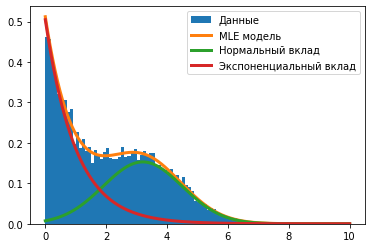

In [1]:
import tensorflow as tf
import zfit
from zfit import z
import matplotlib.pyplot as plt
import numpy as np

# Зададим область определения данных
obs = zfit.Space('x', limits=(0, 10))

# Зададим экспоненциальную модель
lam = zfit.Parameter("l"   , -1, floating=False)
expon = zfit.pdf.Exponential(obs=obs, lam=lam)

# Зададим нормальную модель 
mu    = zfit.Parameter("mu"   , 3.2, floating=False)
sigma = zfit.Parameter("sigma", 1.3, 0.5, 5, floating=False)
gauss = zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigma)

# Зададим комбинированую модель
f =  zfit.Parameter("f", 0.5, 0, 1)
model = zfit.pdf.SumPDF([gauss, expon], fracs=f)

# Сделаем выборку
n_sample = 10000
true_f = 0.4
exp_data = expon.sample(n=n_sample * (1 - true_f)).numpy()
gauss_data = gauss.sample(n=n_sample * true_f).numpy()
data = model.create_sampler(n_sample, limits=obs)
data.resample()

# Зададим функцию потерь
nll = zfit.loss.UnbinnedNLL(model=model, data=data)

# Минимизируем функцию потерь
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
print(result)

# Изобразим результаты
x_plot = np.linspace(0, 10, 1000)
y_plot = zfit.run(model.pdf(x_plot, norm_range=obs))
y_plot_gs = zfit.run(gauss.pdf(x_plot, norm_range=obs))*f
y_plot_exp = zfit.run(expon.pdf(x_plot, norm_range=obs))*(1-f)

plt.hist(data.numpy(), range = [0, 10], bins = 100, density = True, label = "Данные")
plt.plot(x_plot, y_plot, linewidth = 3,  label = "MLE модель")
plt.plot(x_plot, y_plot_gs, linewidth = 3,  label = "Нормальный вклад")
plt.plot(x_plot, y_plot_exp, linewidth = 3, label = "Экспоненциальный вклад")
plt.legend()
plt.show()

